In [1]:
import sys
if sys.version_info[0] < 3:
	raise Exception("Python 3 not detected.")
import matplotlib.pyplot as plt
from sklearn import svm
from scipy import io

## Data partitioning
Rarely will you receive “training” data and “validation” data; usually you
will have to partition available labeled data yourself. In this question, you will shuffle and partition each of the datasets in the assignment1
. Shuffling prior to splitting crucially ensures that
all classes are represented in your partitions. For this question, please do not use any functions
available in sklearn. For the MNIST dataset, write code that sets aside 10,000 training images
as a validation set. For the spam dataset, write code that sets aside 20% of the training data as
a validation set.

In [2]:
# Data MNIST
import numpy
def data_partition_mnist(x,y):
    totol_size=x.shape[0]
    indices=numpy.arange(totol_size)
    numpy.random.shuffle(indices)

    val_num=10000
    val_indices=indices[:val_num]
    train_indices=indices[val_num:]

    # validate data&labels
    x_val=x[val_indices]
    y_val=y[val_indices]

    # train data&labels
    x_train=x[train_indices]
    y_train=y[train_indices]
    
    return x_train,y_train,x_val,y_val

# Data Spam
def data_partition_spam(x,y):
    totol_size=x.shape[0]
    indices=numpy.arange(totol_size)
    numpy.random.shuffle(indices)

    val_num=int(totol_size*0.2)
    val_indices=indices[:val_num]
    train_indices=indices[val_num:]

    # validate data&labels
    x_val=x[val_indices]
    y_val=y[val_indices]

    # train data&labels
    x_train=x[train_indices]
    y_train=y[train_indices]
    
    return x_train,y_train,x_val,y_val


# For each dataset, plot the classification accuracy
# if not do that,hyperparameters will not work
def do_standardize(test_data, train_data):
    test_data = test_data.reshape(len(test_data), -1)
    train_data = train_data.reshape(len(train_data), -1)
    index = len(test_data)
    print(index)
    data = numpy.append(test_data, train_data, axis=0)
    data = (data - numpy.min(data))/(numpy.max(data) - numpy.min(data))
    return data[0: index, :], data[index::, :]



## Evaluation metric

In [3]:
#  y: true labels,y_pred: predicted labels
def evaluate_metric(y,y_pred):
    accuracy_score=0
    counter=0
    n=y.shape[0]
    if y.shape[0] != y_pred.shape[0]:
        raise ValueError("shape is not matched")
    return  numpy.mean(y==y_pred)

## Support Vector Machines: Coding

10000


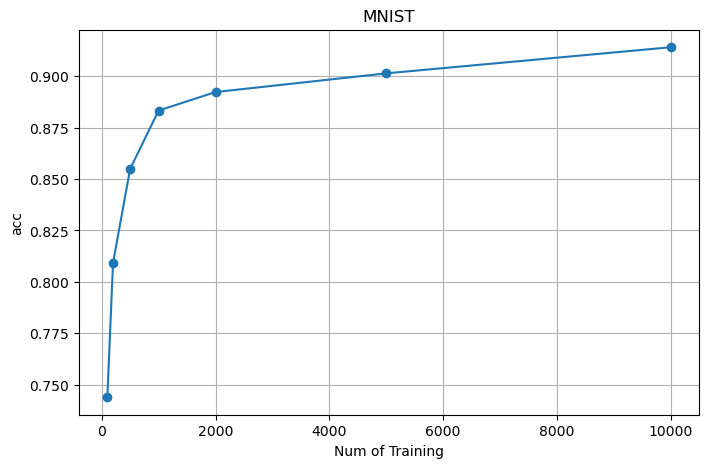

1000


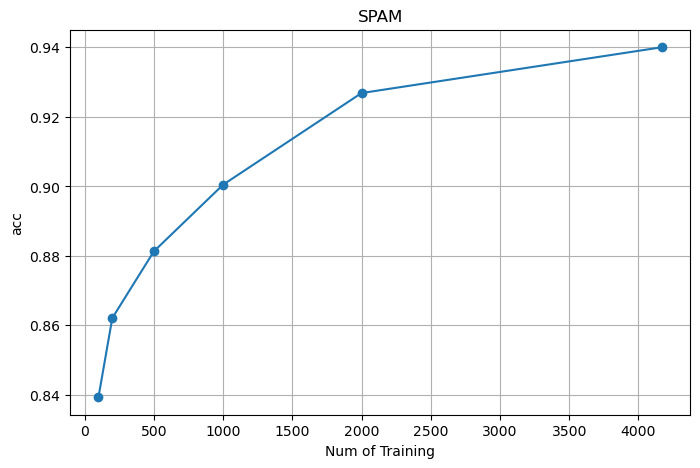

In [4]:
# For each dataset, plot the classification accuracy

# MNIST
acc_mnist=[]
data_mnist=numpy.load(f"../data/{"mnist"}-data.npz")
test_data = data_mnist["test_data"]
train_data = data_mnist['training_data']
test_data, train_data = do_standardize(test_data, train_data)
x_train_mnist,y_train_mnist,x_val_mnist,y_val_mnist=data_partition_mnist(train_data,data_mnist["training_labels"])
train_sizes_mnist=[100,200,500,1000,2000,5000,10000]
x_train_mnist = x_train_mnist.reshape(x_train_mnist.shape[0], -1)
y_train_mnist = y_train_mnist
x_val_mnist=x_val_mnist.reshape(x_val_mnist.shape[0],-1)
y_val_mnist=y_val_mnist.ravel()

for train_size in train_sizes_mnist:
    x_train=x_train_mnist[:train_size]
    y_train=y_train_mnist[:train_size]
    
    svm_mnist=svm.SVC(kernel='linear',)
    svm_mnist.fit(x_train,y_train)
    y_pred=svm_mnist.predict(x_val_mnist)
    acc=evaluate_metric(y_val_mnist,y_pred)
    acc_mnist.append(acc)

plt.figure(figsize=(8,5))
plt.plot(train_sizes_mnist,acc_mnist,marker='o',linestyle='-')
plt.title("MNIST")
plt.xlabel('Num of Training')
plt.ylabel('acc')
plt.grid(True)
plt.show()



# SPAM
acc_spam=[]
data_spam=numpy.load(f"../data/{"spam"}-data.npz")
train_data_spam=data_spam["training_data"]
test_data_spam=data_spam["test_data"]
label_data_spam=data_spam["training_labels"]
test_data_spam,train_data_spam=do_standardize(test_data_spam,train_data_spam)
x_train_spam,y_train_spam,x_val_spam,y_val_spam=data_partition_spam(data_spam["training_data"],data_spam["training_labels"])
train_sizes_spam= [100, 200, 500, 1000, 2000, 4171]

for train_size in train_sizes_spam:
    x_train=x_train_spam[:train_size]
    y_train=y_train_spam[:train_size]

    svm_spam=svm.SVC(kernel='linear')
    svm_spam.fit(x_train,y_train)
    y_pred=svm_spam.predict(x_val_spam)
    acc=evaluate_metric(y_val_spam,y_pred)
    acc_spam.append(acc)

plt.figure(figsize=(8,5))
plt.plot(train_sizes_spam,acc_spam,marker='o',linestyle='-')
plt.title("SPAM")
plt.xlabel('Num of Training')
plt.ylabel('acc')
plt.grid(True)
plt.show()




## Hyperparameters

In [ ]:


# MNIST
def hyperparameter_get():
    acc_mnist=[]
    best_score=0
    c_lists=[0.01, 0.1, 1, 10, 100, 1000]
    best_c=0
    train_size=10000


    for c in c_lists:
        x_train=x_train_mnist[:train_size]
        y_train=y_train_mnist[:train_size]
        
        svm_mnist=svm.SVC(kernel='linear',C=c)
        svm_mnist.fit(x_train,y_train)
        y_pred=svm_mnist.predict(x_val_mnist)
        acc=evaluate_metric(y_val_mnist,y_pred)
        print(f"c={c}, acc={acc}")
        if acc >best_score:
            best_score=acc
            best_c=c


    print("best_c is {},accuracy rate is {}".format(best_c,best_score))
    return best_c

# test
hyperparameter_get()







c=0.01, acc=0.9385
c=0.1, acc=0.9418
c=7.5, acc=0.9278
c=1, acc=0.9373
c=10, acc=0.9255


KeyboardInterrupt: 

##  K-Fold Cross-Validation

In [ ]:
# for spam,because of small dataset
def k_fold_cross_validation(k,train_data_spam,label_data_spam):
    c_lists=[0.001,0.01, 0.1, 1, 10, 100, 1000,10000]
    totol_num=train_data_spam.shape[0]
    indices=numpy.arange(totol_num)
    numpy.random.shuffle(indices)
    train_data_spam=train_data_spam[indices]
    label_data_spam=label_data_spam[indices]
    folds=numpy.array_split(train_data_spam,k)
    folds_label=numpy.array_split(label_data_spam,k)

    best_score_spam=0
    best_c_spam=0

    for c in c_lists:
        acc=0
        for i in range(k):
            x_train_data_k = numpy.concatenate(folds[:i] + folds[i+1:], axis=0)
            y_train_data_k = numpy.concatenate(folds_label[:i] + folds_label[i+1:], axis=0)
            x_val_data_1=folds[i]
            y_val_data_1=folds_label[i]
            svm_mnist=svm.SVC(kernel='linear',C=c)
            svm_mnist.fit(x_train_data_k,y_train_data_k)
            y_pred=svm_mnist.predict(x_val_data_1)
            acc+=evaluate_metric(y_val_data_1,y_pred)
        acc=acc/k
        if acc >best_score_spam:
            best_score_spam=acc
            best_c_spam=c
    
    print("best_c is {},accuracy rate is {}".format(best_c_spam,best_score_spam))
    return best_c_spam
            

# test
k_fold_cross_validation(5,train_data_spam,label_data_spam)



best_c is 10000,accuracy rate is 0.7748744238142421


10000